# Module 3.8 — Emotional Mapping of Drawdowns
#### Intent:
Translate drawdown statistics into predictable emotional responses.
#### Premise:
If paths are random but bounded, then emotional reactions are also patterned — not personal flaws.
#### Constraint:
No behavior correction, no coping advice, no judgment.

## Emotional State Definitions (Modeling Choice)

| State       | Mechanical trigger               |
| ----------- | -------------------------------- |
| Neutral     | At equity peak                   |
| Frustration | Shallow drawdown, short duration |
| Doubt       | Shallow drawdown, long duration  |
| Fear        | Deep drawdown, short duration    |
| Panic       | Deep drawdown, long duration     |
| Relief      | Recovery to peak                 |

> These are not universal truths.      
They are a transparent modeling choice.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

depth_threshold = 10
duration_threshold = 40
#np.random.seed(47)

In [41]:
def emotional_state(depth, duration):
    if depth == 0:
        return "neutral"
    if depth < depth_threshold and duration < duration_threshold:
        return "frustration"
    if depth < depth_threshold and duration >= duration_threshold:
        return "doubt"
    if depth >= depth_threshold and duration < duration_threshold:
        return "fear"
    return "panic"

    

In [42]:
n_agents = 1000
n_trades = 500

wins = 275
losses = n_trades - wins

outcomes = np.array([1]*wins + [-1]*losses)
paths = np.array(
    [np.random.permutation(outcomes) for _ in range(n_agents)]
)
equity = np.cumsum(paths, axis = 1)

In [43]:
running_peak = np.maximum.accumulate(equity, axis = 1)
drawdown_depth = running_peak - equity

drawdown_duration = np.zeros_like(equity)

for k in range(equity.shape[0]):
    duration_count = 0

    for i in range(equity.shape[1]):
        if equity[k, i] < running_peak[k, i]:
            duration_count += 1
        else:
            duration_count = 0
        
        drawdown_duration[k, i] = duration_count
        
 

In [44]:
emotion_map = np.empty(equity.shape, dtype = object)

for i in range(equity.shape[0]):
    for t in range(equity.shape[1]):
        emotion_map[i, t] = emotional_state(
            depth = drawdown_depth[i, t],
            duration = drawdown_duration[i, t]
        )

In [45]:
unique, counts = np.unique(emotion_map, return_counts=True)
dict(zip(unique, counts))


{'doubt': 78974,
 'fear': 8621,
 'frustration': 284860,
 'neutral': 99120,
 'panic': 28425}

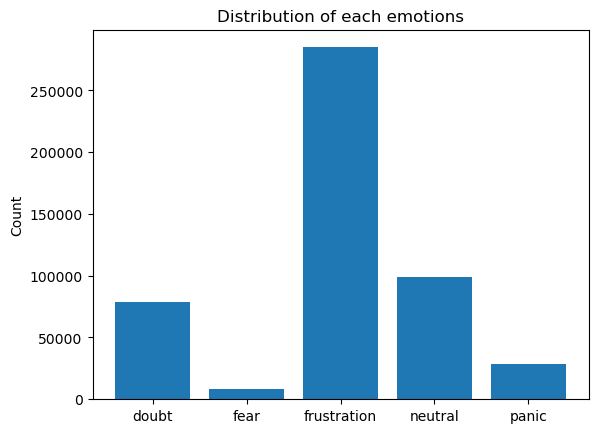

In [48]:
plt.figure()
plt.bar(x = unique, height = counts)
plt.title('Distribution of each emotions')
plt.ylabel('Count')
plt.show()

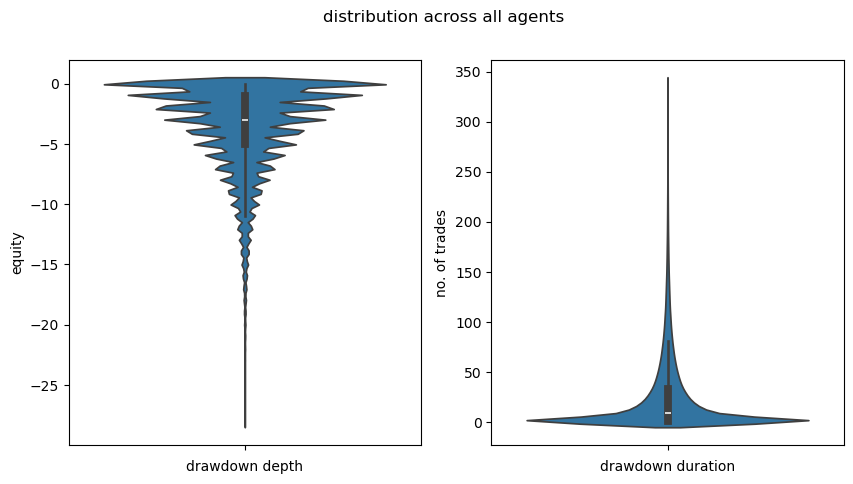

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.violinplot(drawdown_depth.ravel()*(-1), ax = ax[0])
ax[0].set_xlabel('drawdown depth')
ax[0].set_ylabel('equity')


sns.violinplot(drawdown_duration.ravel(), ax = ax[1])
ax[1].set_xlabel('drawdown duration')
ax[1].set_ylabel('no. of trades')

fig.suptitle('distribution across all agents')
plt.show()

### Observations

This simulation maps emotional states to every point along the equity path, based solely on drawdown depth and drawdown duration relative to the running peak.

Several structural patterns emerge:

- Most emotional exposure occurs in *shallow but persistent drawdowns*, not extreme losses.
- “Frustration” and “doubt” dominate the emotional landscape, while panic and fear are comparatively rare.
- Deep drawdowns tend to be brief, whereas long drawdowns are usually shallow.
- Emotional states shift continuously within a drawdown, rather than remaining fixed for its entire duration.

This highlights that emotional stress is not driven primarily by loss magnitude, but by **time spent waiting without resolution**.

Emotions arise predictably from equity structure, not from personal weakness or decision errors. What traders experience emotionally is a direct and repeatable consequence of variance unfolding through time.
